<a href="https://colab.research.google.com/github/falawar7/AAI614_ELAWAR/blob/main/Week6/FE_Notebook6_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 6.5: Experiment with PCA*


*Source: This notebook contains an amanded excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas*

In [104]:
from packaging import version
import sklearn
import matplotlib

assert version.parse(matplotlib.__version__) >= version.parse("3.7.3")

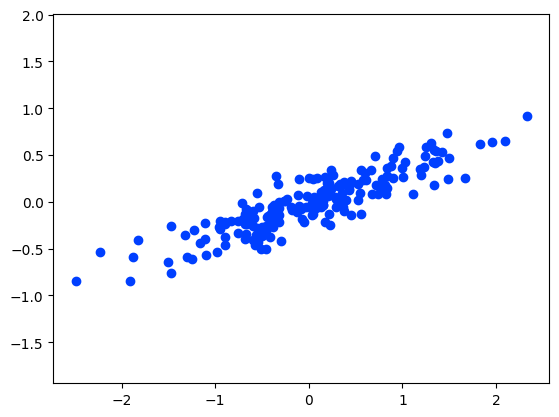

In [105]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [106]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=5)

PCA(n_components=5)

In [108]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [109]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


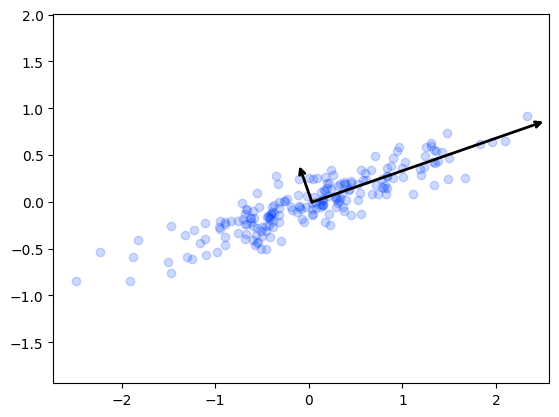

In [110]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [111]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


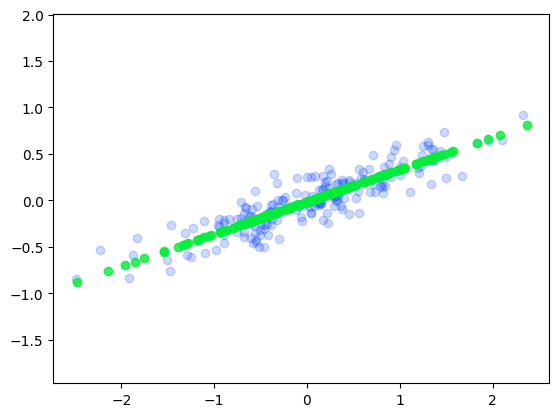

In [112]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [113]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [114]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


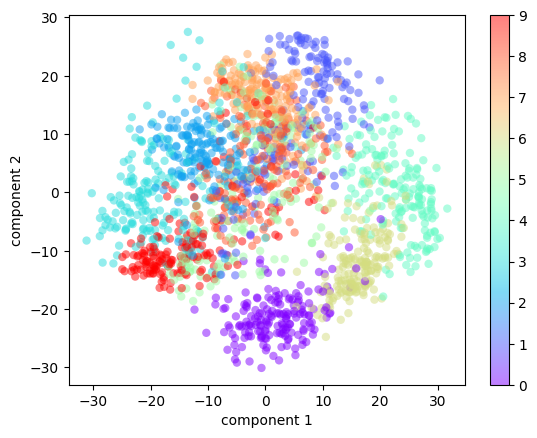

In [115]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=matplotlib.colormaps.get_cmap('rainbow'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [116]:
print("Eigenvalues: \n", pca.explained_variance_ratio_)
print("Eigenvectors: \n", pca.components_)

Eigenvalues: 
 [0.14890594 0.13618771]
Eigenvectors: 
 [[ 0.00000000e+00 -1.73094651e-02 -2.23428835e-01 -1.35913304e-01
  -3.30323092e-02 -9.66340844e-02 -8.32943805e-03  2.26900082e-03
  -3.20516495e-04 -1.19308905e-01 -2.44451676e-01  1.48512745e-01
  -4.67319410e-02 -2.17740744e-01 -1.48136776e-02  4.47779518e-03
  -4.94136398e-05 -7.95419375e-02  8.33951454e-02  2.15915342e-01
  -1.72126801e-01 -1.63712098e-01  2.86444452e-02  4.23251803e-03
   9.85488574e-05  6.42319144e-02  2.54093316e-01 -3.56771026e-02
  -2.09462569e-01 -4.31311420e-02  5.13118688e-02  2.13422732e-04
   0.00000000e+00  1.59950883e-01  3.68690774e-01  1.64406827e-01
   8.52007908e-02  3.72982855e-02  2.15866980e-02  0.00000000e+00
   1.28865585e-03  1.06945287e-01  3.03067457e-01  2.47813041e-01
   2.09637296e-01  1.22325219e-02 -3.69458497e-02  1.61485028e-03
   6.93023548e-04 -8.35144239e-03 -5.58598986e-02  9.30534169e-02
   1.07387720e-01 -1.37734565e-01 -6.32879466e-02  9.61671077e-04
   9.55079131e-06 -1.

In [119]:
digits_recon = pca.inverse_transform(projected)

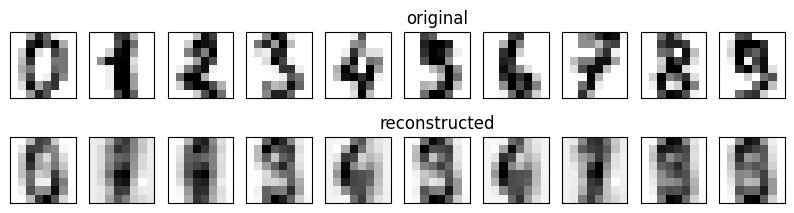

In [120]:
fig, axes = plt.subplots(2, 10, figsize=(10, 2.5))

for i in range(10):
  ax = axes[0, i]
  ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
  ax.set_xticks([])
  ax.set_yticks([])
  if i == 5:
    ax.set_title("original")

  ax = axes[1, i]
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(digits_recon[i].reshape(8, 8), cmap=plt.cm.binary, interpolation='nearest')
  if i == 5:
    ax.set_title("reconstructed")

In [184]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.72962445 0.22850762]


In [186]:
for i in range(len(pca.explained_variance_)):
  print(f'variance for Principal Component {i+1} is {pca.explained_variance_[i]} variance ratio is {pca.explained_variance_ratio_[i]}')

variance for Principal Component 1 is 2.9380850501999958 variance ratio is 0.7296244541329991
variance for Principal Component 2 is 0.9201649041624861 variance ratio is 0.22850761786701745


In [ ]:
for i, value in enumerate(pca.explained_variance_ratio_):
  plt.bar(x = i, height = pca.explained_variance_ratio_[i]*100)
  plt.text(x = i, y = value*100 + 1, s = f"{value*100:.2f}%", ha='center', fontsize=9, color='black')

plt.xticks(ticks=range(len(pca.explained_variance_)), labels=[f'PC {i+1}' for i in range(len(pca.explained_variance_))])
plt.ylim(0, 100)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Percentage')
plt.title('Explained Variance Percentage per Principal Component')
plt.show()

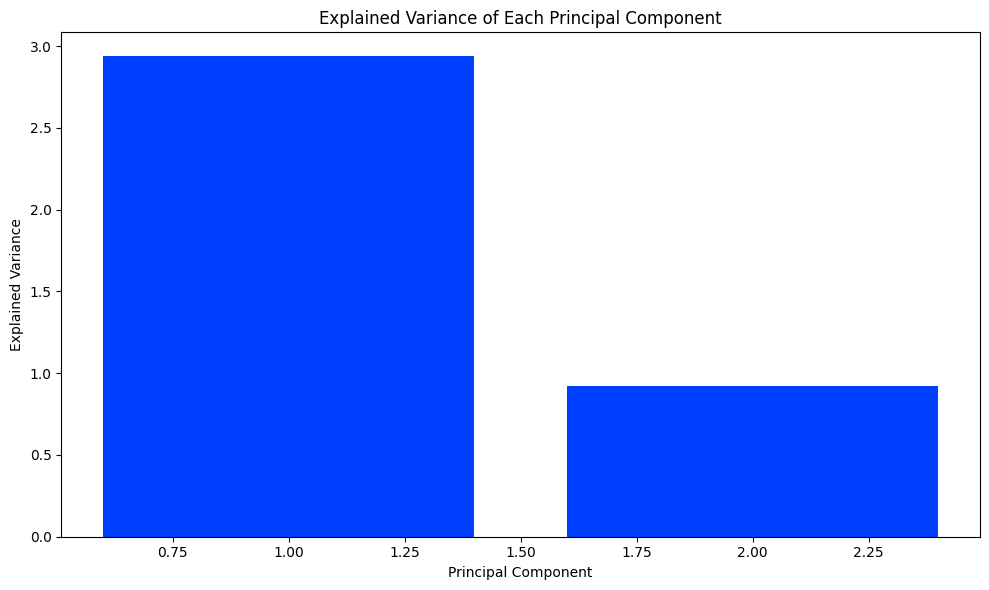

In [195]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
ax.set_title('Explained Variance of Each Principal Component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')

plt.tight_layout()
plt.show()

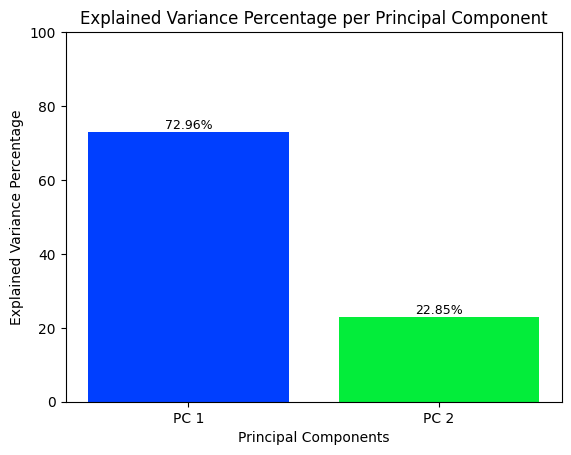

In [194]:
for i, value in enumerate(pca.explained_variance_ratio_):
  plt.bar(x = i, height = pca.explained_variance_ratio_[i]*100)
  plt.text(x = i, y = value*100 + 1, s = f"{value*100:.2f}%", ha='center', fontsize=9, color='black')

plt.xticks(ticks=range(len(pca.explained_variance_)), labels=[f'PC {i+1}' for i in range(len(pca.explained_variance_))])
plt.ylim(0, 100)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Percentage')
plt.title('Explained Variance Percentage per Principal Component')
plt.show()

In [122]:
print(pca.components_.shape)

(2, 64)


# **Working with IRIS Data**

In [ ]:
from packaging import version
import sklearn
import matplotlib

assert version.parse(matplotlib.__version__) >= version.parse("3.7.3")

In [ ]:
iris = datasets.load_iris()
iris_data = iris.data

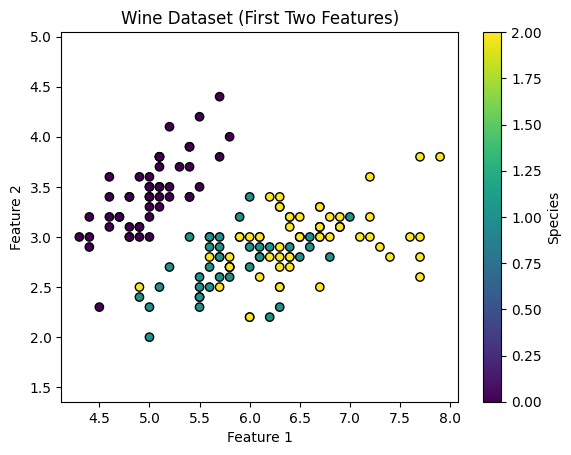

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn-v0_8-bright')


iris = datasets.load_iris()
X = iris.data[:, :2]

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', edgecolors='k')
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wine Dataset (First Two Features)')
plt.colorbar(label='Species')
plt.show()

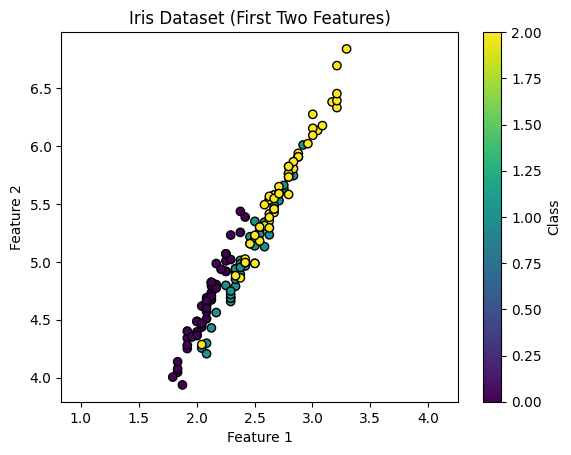

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(iris_data[:, :2], rng.rand(2, 2))

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', edgecolors='k')
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset (First Two Features)')
plt.colorbar(label='Class')
plt.show()

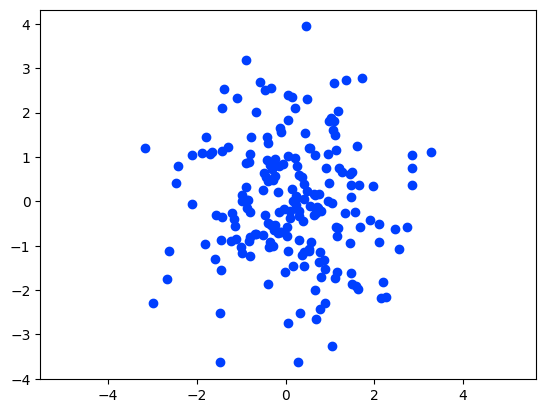

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

rng = np.random.RandomState(1)
X = np.dot(iris_data[2, 2], rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(iris_data[2, 2], rng.randn(2, 200)).T

In [ ]:
from sklearn.decomposition import PCA

pca_iris = PCA(n_components=2)
pca_iris.fit(X)
pca_iris = PCA(n_components=5)

In [ ]:
from sklearn.decomposition import PCA

pca_iris = PCA(n_components=2)
pca_iris.fit(X)


pca_iris.components_

array([[-0.17857538,  0.98392623],
       [ 0.98392623,  0.17857538]])

In [ ]:
print(pca_iris.explained_variance_)

[1.83429621 1.39257772]


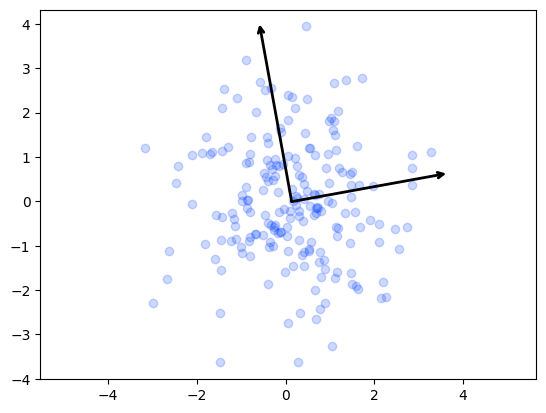

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca_iris.explained_variance_, pca_iris.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_iris.mean_, pca_iris.mean_ + v)
plt.axis('equal');

In [ ]:
pc_iris = PCA(n_components=1)
pca_iris.fit(X)
X_pca = pca_iris.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 2)


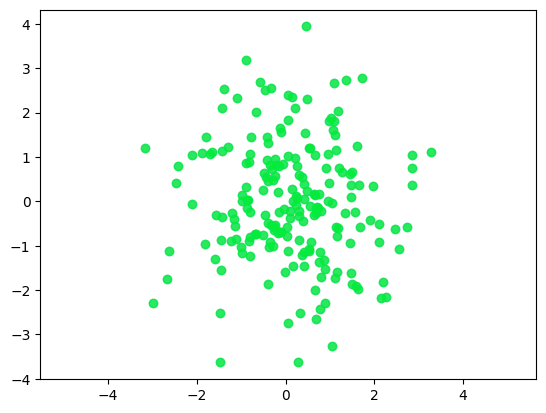

In [ ]:
X_new = pca_iris.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [ ]:
pca_iris = PCA(2) # project from 64 to 2 dimensions
projected_iris = pca_iris.fit_transform(iris.data)
print(iris.data.shape)
print(projected_iris.shape)

(150, 4)
(150, 2)


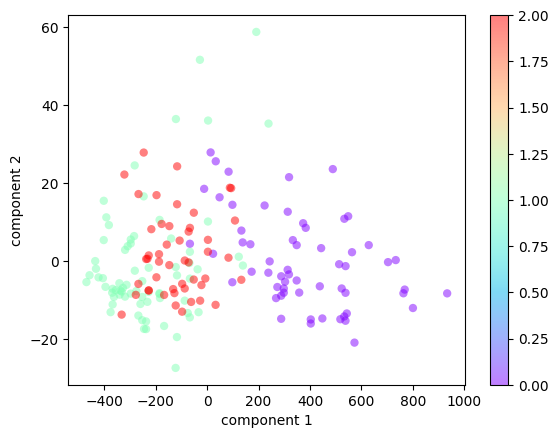

In [ ]:
plt.scatter(projected_wine[:, 0], projected_wine[:, 1], c=wine.target, edgecolor='none', alpha=0.5, cmap=matplotlib.colormaps.get_cmap('rainbow'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [161]:
iris_recon = pca_iris.inverse_transform(projected)

In [169]:
iris = load_iris()
X = iris.data
y = iris.target



In [170]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [171]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


In [172]:
X_reconstructed = pca.inverse_transform(X_pca)

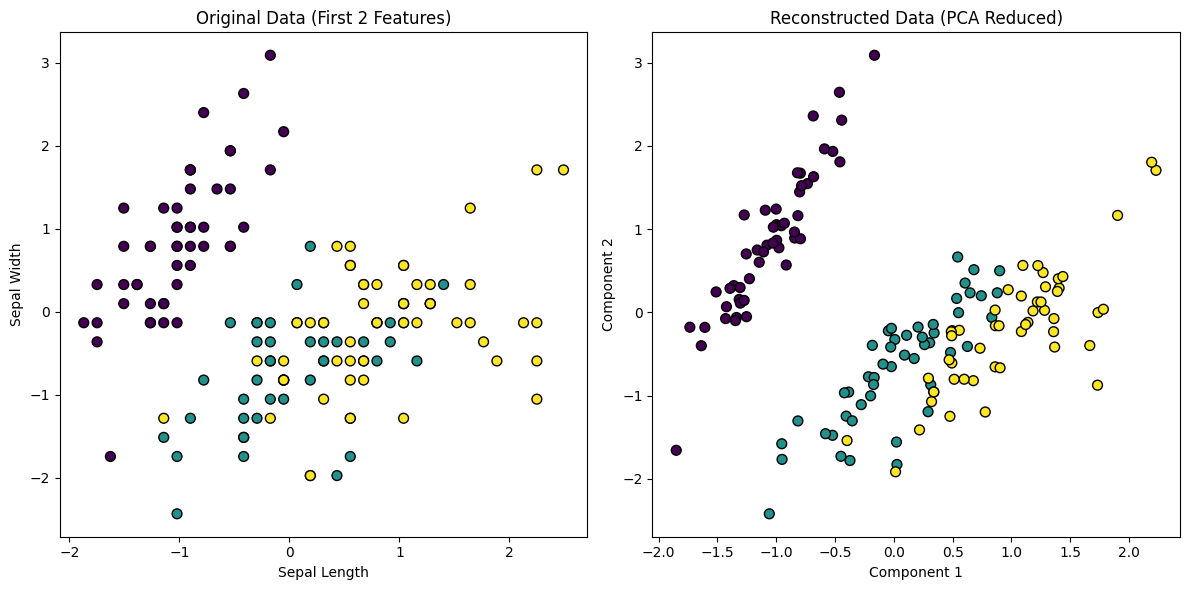

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data in 2D using the first two features
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
axes[0].set_title("Original Data (First 2 Features)")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")

# Plot the reconstructed data in 2D
axes[1].scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
axes[1].set_title("Reconstructed Data (PCA Reduced)")
axes[1].set_xlabel("Component 1")
axes[1].set_ylabel("Component 2")

plt.tight_layout()
plt.show()

In [174]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.72962445 0.22850762]


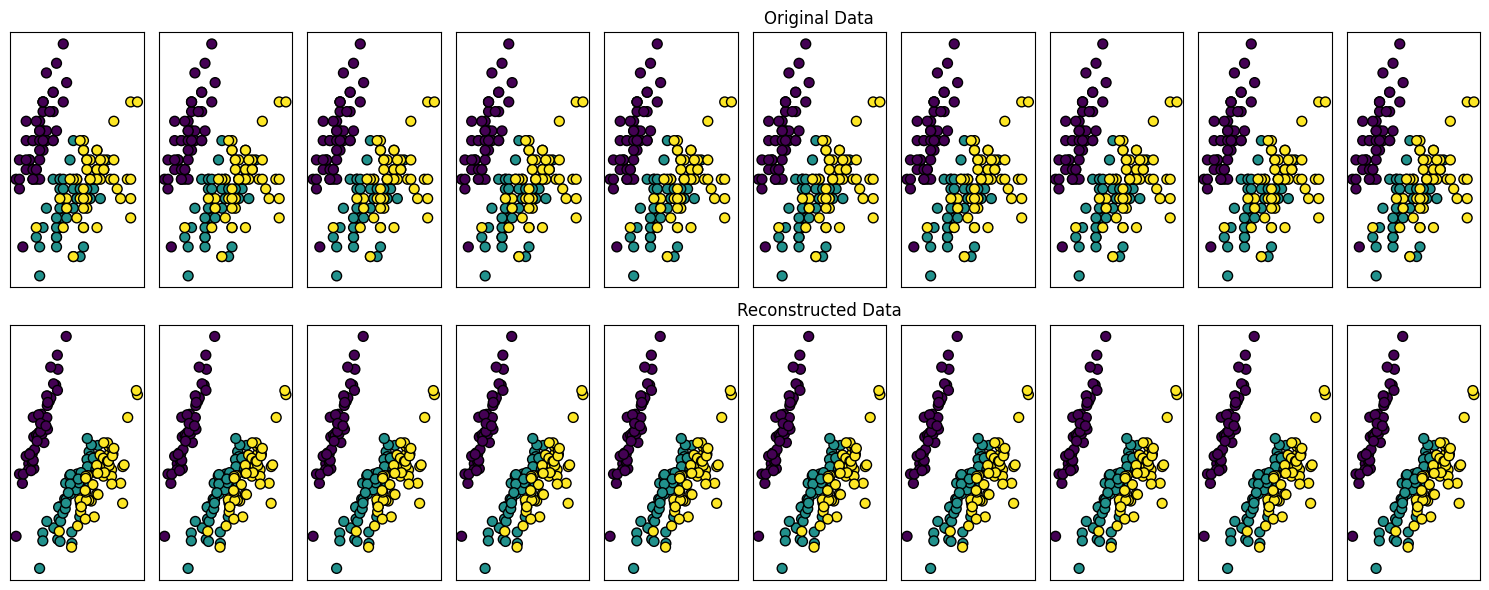

In [178]:
# Plot the original and reconstructed data (scatter plots)
fig, axes = plt.subplots(2, 10, figsize=(15, 6))

for i in range(10):
    # Plotting the original data
    ax = axes[0, i]
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    ax.set_xticks([])
    ax.set_yticks([])
    if i == 5:
        ax.set_title("Original Data")

    # Plotting the reconstructed data
    ax = axes[1, i]
    ax.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    ax.set_xticks([])
    ax.set_yticks([])
    if i == 5:
        ax.set_title("Reconstructed Data")

plt.tight_layout()
plt.show()